In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy.stats import skew, kurtosis

sns.set(context='talk', style='whitegrid')
pd.set_option('display.max_columns', 100)

In [7]:
PROJECT_ROOT = Path().resolve().parent
DATA_DIR = PROJECT_ROOT / "data" / "processed"
df = pd.read_csv(DATA_DIR / "MSFT_preprocessed.csv", parse_dates=["date"])
df = df.sort_values("date")


Basic Information

In [8]:
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isna().sum())

Dataset shape: (125, 7)

Data types:
 date         datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
adj_close           float64
volume              float64
dtype: object

Missing values:
 date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64


Descriptive Statistics

In [9]:
numeric_cols = ["open", "high", "low", "close", "adj_close", "volume"]
desc = df[numeric_cols].describe().T
desc["skew"] = [skew(df[c].dropna()) for c in desc.index]
desc["kurtosis"] = [kurtosis(df[c].dropna()) for c in desc.index]
display(desc)


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
open,125.0,0.474047,0.274167,0.0,0.192072,0.509273,0.722241,1.0,-0.039889,-1.421278
high,125.0,0.458105,0.286726,0.0,0.150547,0.498036,0.730429,1.0,-0.022080,-1.457713
low,125.0,0.528859,0.300606,0.0,0.217786,0.583133,0.817487,1.0,-0.107083,-1.477917
close,125.0,0.516076,0.303714,0.0,0.198918,0.567705,0.811354,1.0,-0.092728,-1.486778
adj_close,125.0,0.515993,0.304372,0.0,0.197843,0.569250,0.812029,1.0,-0.093140,-1.491132
volume,125.0,0.220918,0.182022,0.0,0.098162,0.172137,0.252997,1.0,1.969759,4.295790


Univariate distributions

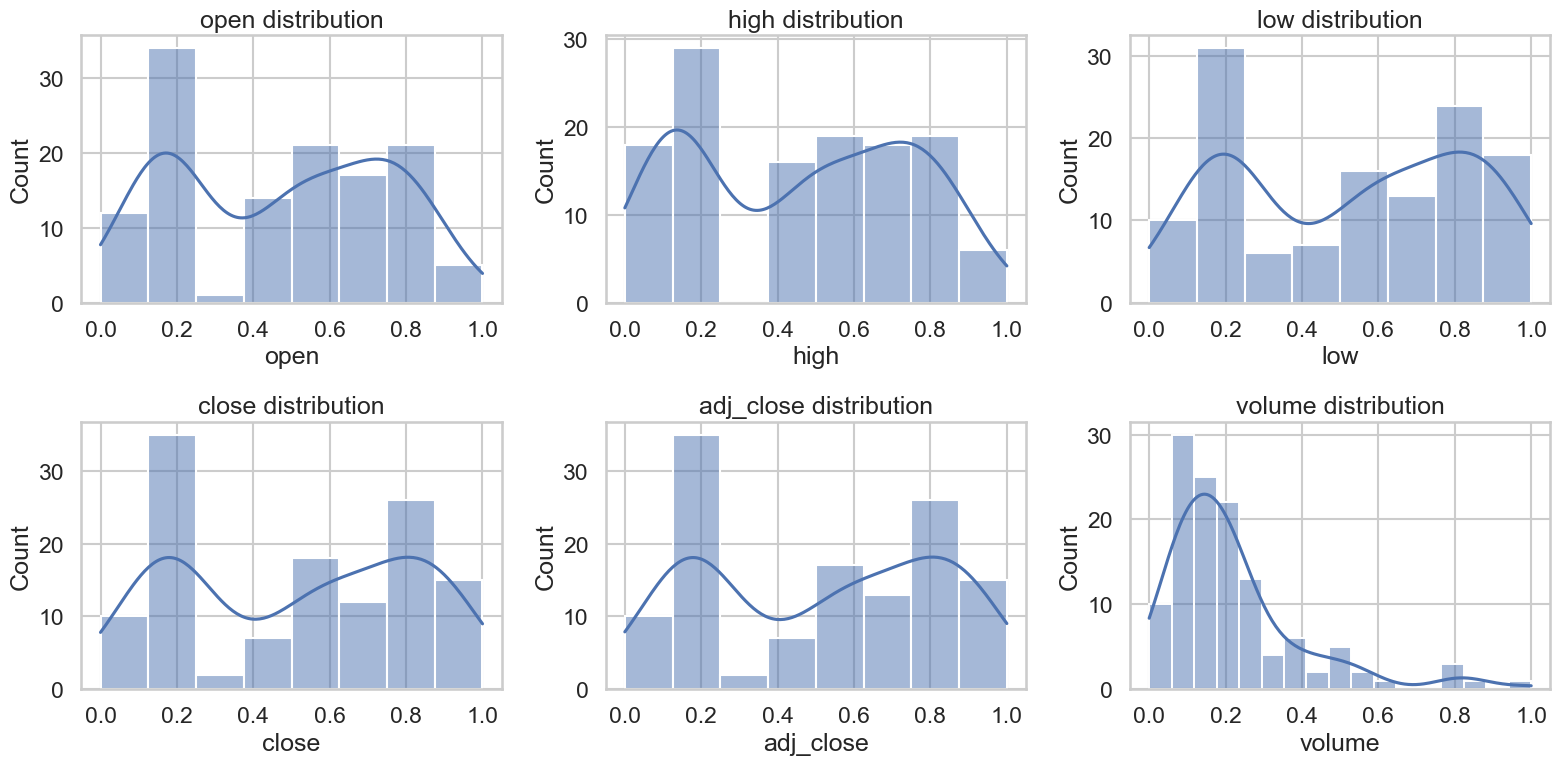

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
for ax, col in zip(axes.flatten(), numeric_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f"{col} distribution")
plt.tight_layout()
plt.show()


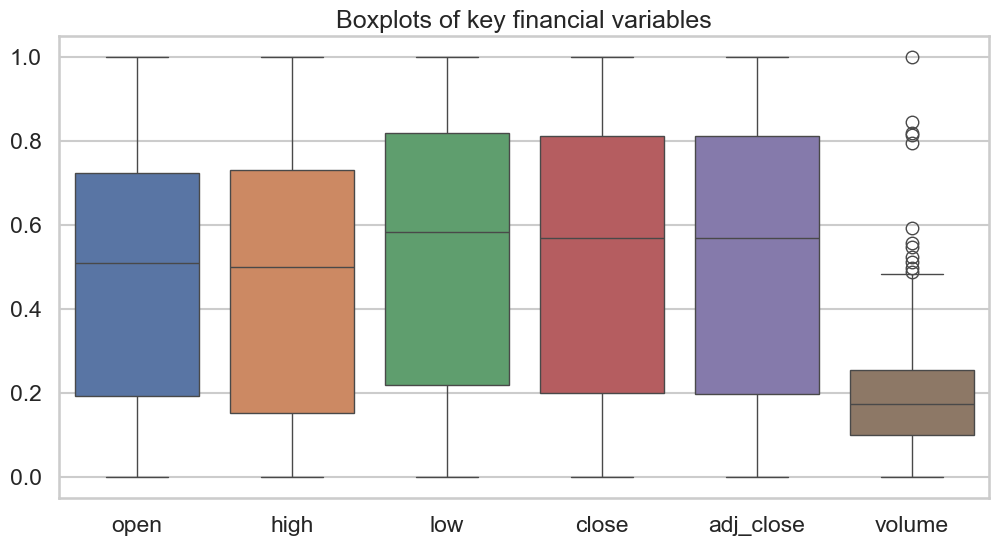

In [11]:
# Boxplots for outlier detection
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplots of key financial variables")
plt.show()

Time series plots

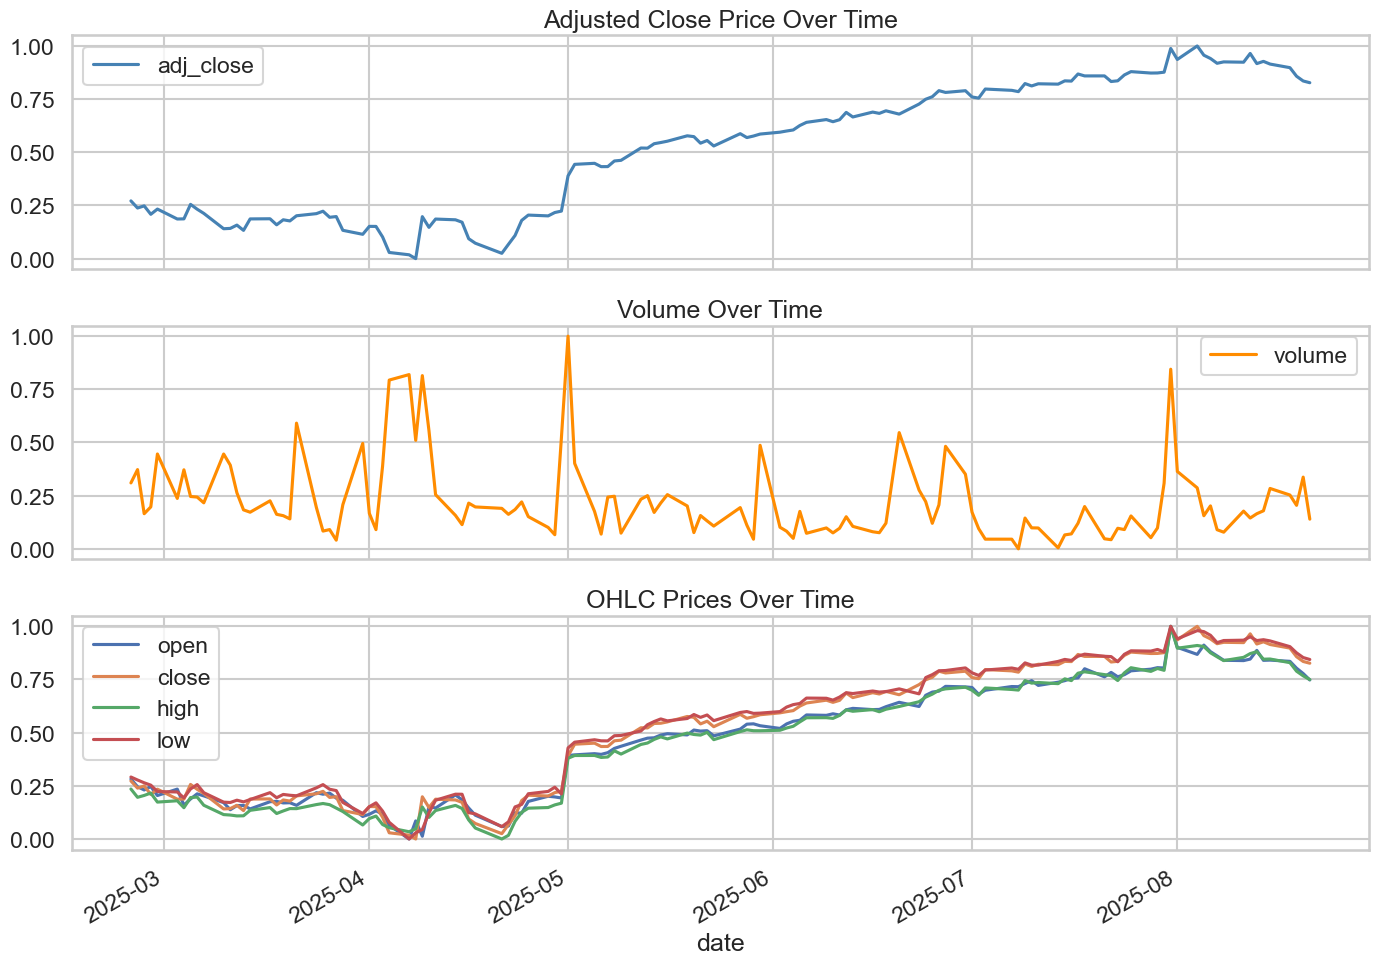

In [12]:
fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharex=True)
df.plot(x="date", y="adj_close", ax=axes[0], title="Adjusted Close Price Over Time", color="steelblue")
df.plot(x="date", y="volume", ax=axes[1], title="Volume Over Time", color="darkorange")
df[["date","open","close","high","low"]].set_index("date").plot(ax=axes[2], title="OHLC Prices Over Time")
plt.tight_layout()
plt.show()


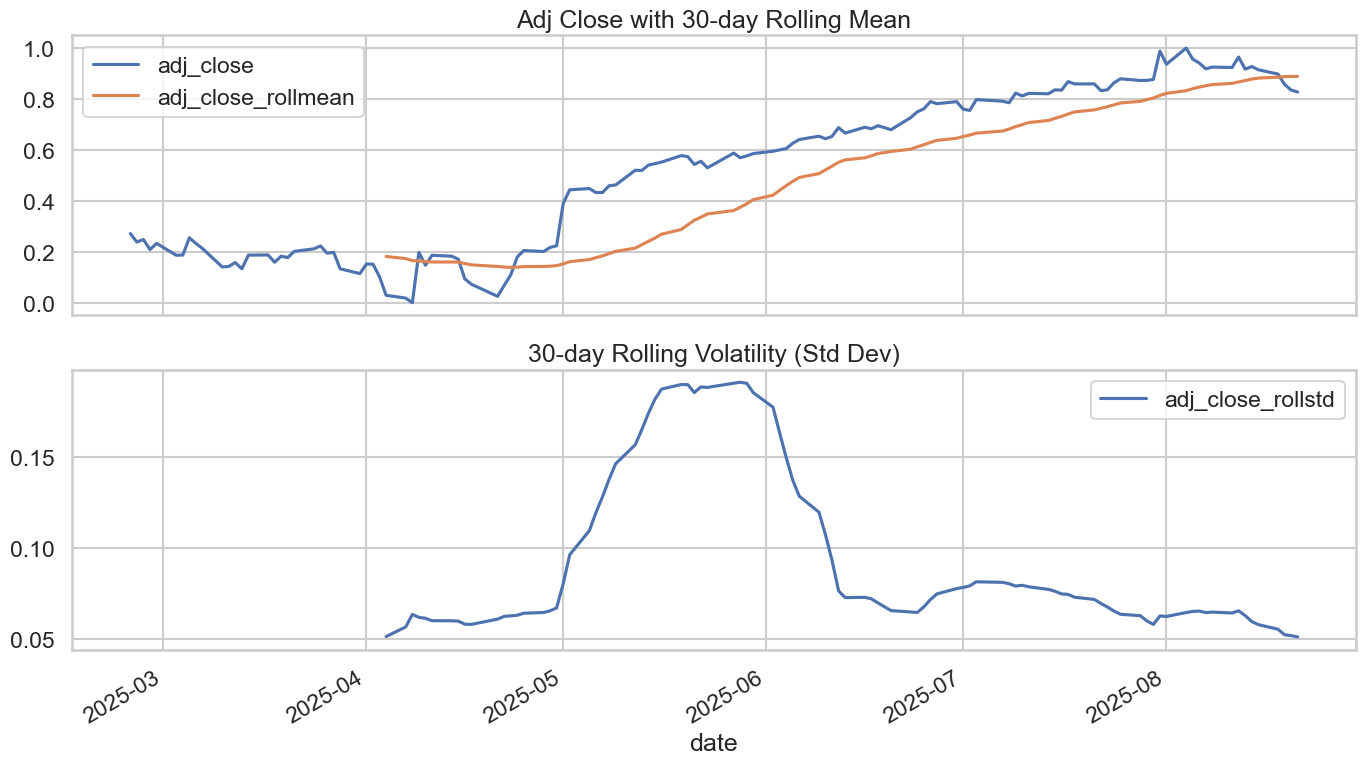

In [13]:
# Rolling mean & volatility
window = 30
df["adj_close_rollmean"] = df["adj_close"].rolling(window).mean()
df["adj_close_rollstd"] = df["adj_close"].rolling(window).std()

fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
df.plot(x="date", y=["adj_close","adj_close_rollmean"], ax=ax[0], title=f"Adj Close with {window}-day Rolling Mean")
df.plot(x="date", y="adj_close_rollstd", ax=ax[1], title=f"{window}-day Rolling Volatility (Std Dev)")
plt.tight_layout()
plt.show()

Bivariate Analysis

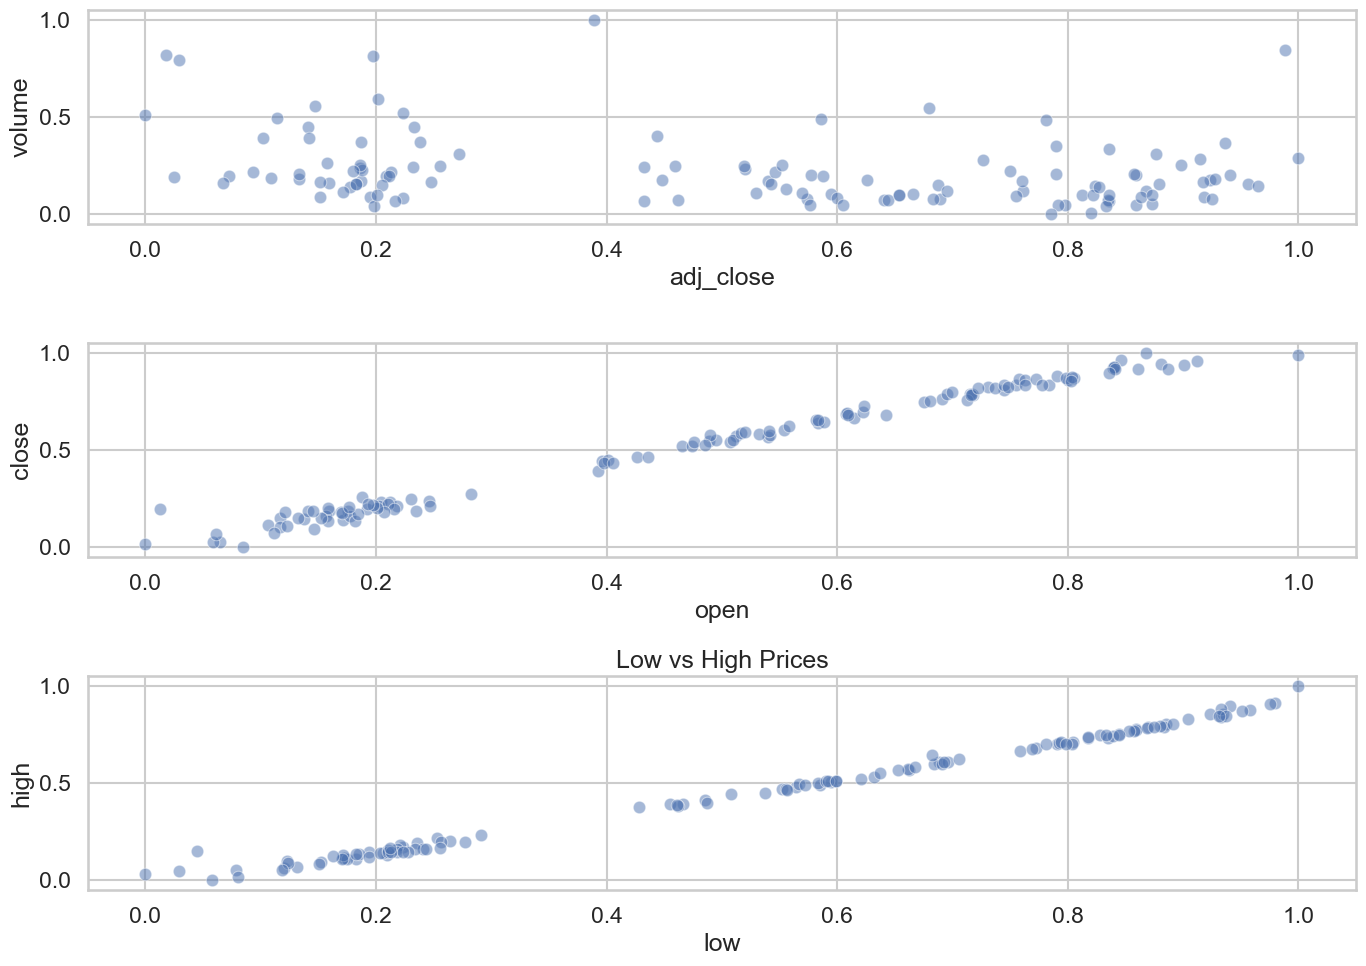

In [17]:
fig, axes = plt.subplots(3, 1, figsize=(14, 10))
# adj_close vs volume
sns.scatterplot(data=df, x="adj_close", y="volume", alpha=0.5, ax=axes[0])
plt.title("Adj Close vs Volume")

# open vs close
sns.scatterplot(data=df, x="open", y="close", alpha=0.5, ax=axes[1])
plt.title("Open vs Close Prices")

# high vs low
sns.scatterplot(data=df, x="low", y="high", alpha=0.5, ax=axes[2])
plt.title("Low vs High Prices")

plt.tight_layout()
plt.show()

Correlation Matrix

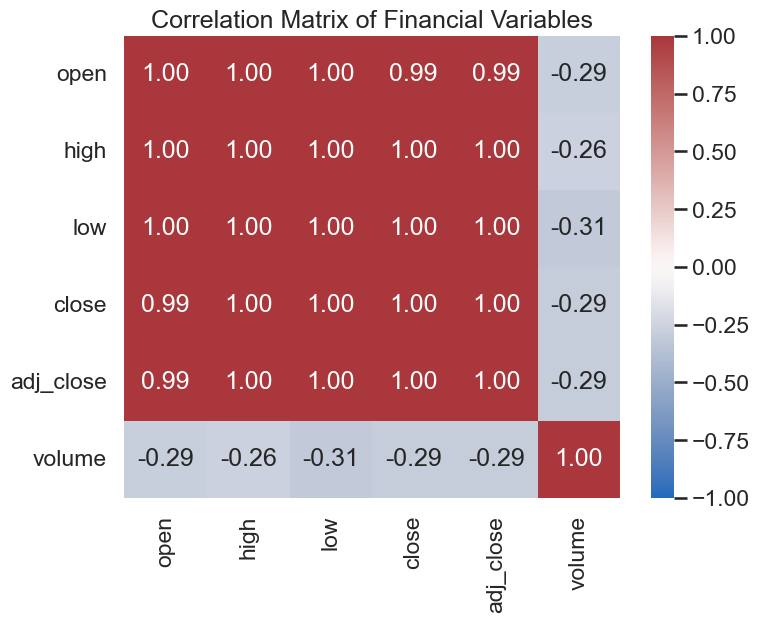

In [18]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Financial Variables")
plt.show()


In [19]:
def eda_summary(df: pd.DataFrame, numeric_cols=None):
    """Return a dict with quick profiling stats and basic missingness.
    numeric_cols: optional list to limit numeric profiling.
    """
    if numeric_cols is None:
        numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    out = {}
    out['shape'] = df.shape
    out['dtypes'] = df.dtypes.to_dict()
    out['missing'] = df.isna().sum().to_dict()
    profile = df[numeric_cols].describe().T
    profile['skew'] = [skew(df[c].dropna()) for c in profile.index]
    profile['kurtosis'] = [kurtosis(df[c].dropna()) for c in profile.index]
    out['numeric_profile'] = profile
    return out

summary = eda_summary(df)
summary['shape'], list(summary['dtypes'].items())[:3]

((125, 9),
 [('date', dtype('<M8[ns]')),
  ('open', dtype('float64')),
  ('high', dtype('float64'))])